<a href="https://colab.research.google.com/github/AdrZx/ADS2002-fyan0039/blob/main/W6_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

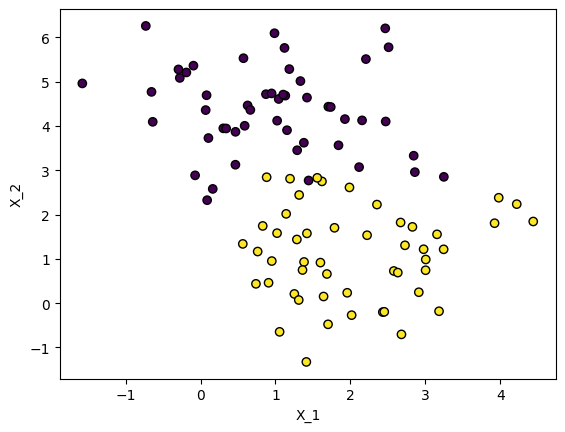

In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, Y = make_blobs(n_features=2, centers=2, random_state=0, cluster_std=1.0)

plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolor='k')
plt.xlabel('X_1')
plt.ylabel('X_2');

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Exercise 1

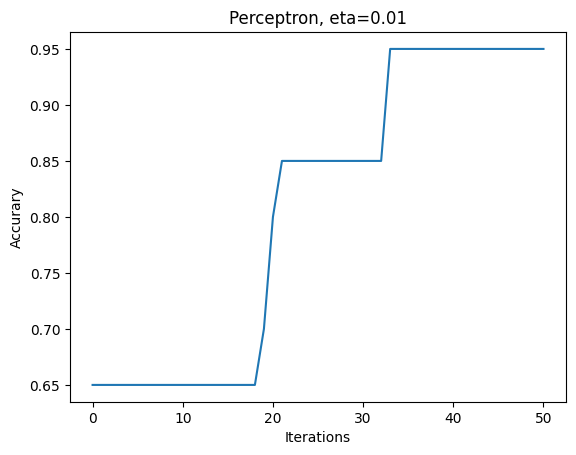

In [5]:
import numpy as np
from sklearn.metrics import accuracy_score

# start with a random distribution of the weights
wp = np.random.rand(3)
eta = 0.01
(l,m) = X_train.shape
# calculate the predictions and accuracy of the model for the test set
Y_pred = np.heaviside(wp[0]+X_test[:,0:2]@wp[1:], 1);
acc = accuracy_score(Y_test, Y_pred)
Acc = [acc]
for n in range(50):
    # take a random sample of a feature
    samp = np.random.randint(0,l)
    x = np.append([1],X_train[samp,0:2])
    # calculate the model prediction for the training set
    y_pred = np.heaviside(x@wp, 1.);
    # use this to update the weights
    wp = wp+eta*(Y_train[samp]-y_pred)*x
    # calculate the predictions and accuracy of the model for the test set
    Y_pred = np.heaviside(wp[0]+X_test[:,0:2]@wp[1:], 1);
    acc = accuracy_score(Y_test, Y_pred)
    Acc.append(acc)

# plot the accuracy
plt.plot(Acc);
plt.xlabel('Iterations')
plt.ylabel('Accurary')
plt.title('Perceptron, eta=0.01');

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(gradient, start, learn_rate, n_iter=50, tolerance=1.e-6):
    '''Implements standard gradient descent'''
    vector = start
    for n in range(n_iter):
        # calculate the gradient vector and the magnitude of the change in the vector
        diff = -learn_rate * gradient(vector)
        # if this is sufficiently small, exit the calculation
        if np.sum(np.abs(diff)) <= tolerance:
            break
        # otherwise, update the vector
        vector = vector+diff
    return vector

In [7]:
def PCF(a, X_t, Y_t):
    '''Loss function for the Perceptron'''
    # calculate the summation for all samples
    arg = -(2*Y_t-1)*(a[0]+X_t[:,0:2]@a[1:])
    # pass this to the activation function, and calculate the mean value
    PCF = np.mean(np.max(np.heaviside(arg,1.)*arg))
    return PCF

def PCF_grad(a, Xt, Yt, batch_size=1):
    '''Gradient of the loss function for the Perceptron'''
    (l,m) = Xt.shape
    # create a random sample of the data set
    smpl = np.random.choice(l, (batch_size), replace=False)
    Y_t = Yt[smpl]
    X_t = Xt[smpl,:]
    # calculate the model prediction
    yp = np.heaviside(-(2*Y_t-1)*(a[0]+X_t[:,0:2]@a[1:]), 1.)*(2*Y_t-1)
    # multitply this the X values, then take the mean
    PCF_grad = -np.array([np.mean(yp), np.mean(yp*X_t[:,0]), np.mean(yp*X_t[:,1])])
    return PCF_grad

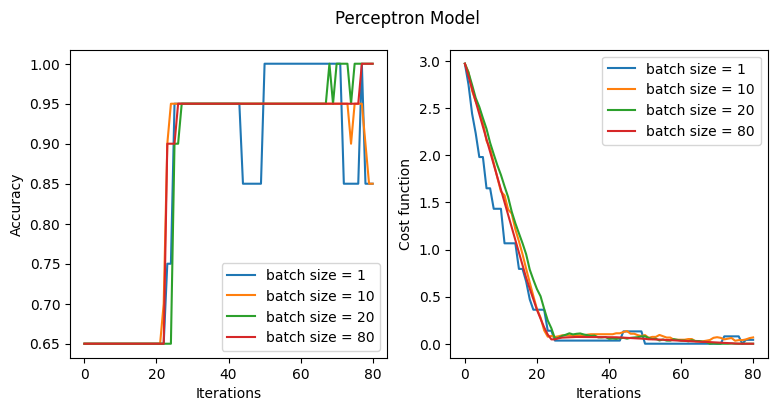

In [8]:
# compare Gradient Descent (full batch) and Stochastic Gradient Descent (batch_size=1)
# for the Pertceptron model using a learning rate of 0.01

# set the learning rate
eta = 0.01
(l,m) = X_train.shape
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,4))
# create a random initialization of the weights to use for both calculations
wp0 = np.random.rand(3)
for bs in [1, 10, 20, 80]: #bs=1 -> SGD, bs=l -> GD
    wp = wp0
    # calculate the accurary and cost function for the test set
    Y_pred = np.heaviside(wp[0]+X_test[:,0:2]@wp[1:], 0.5);
    acc = accuracy_score(Y_pred, Y_test)
    Acc = [acc]
    TeCF = [PCF(wp, X_test, Y_test)]
    # create a gradient function which uses the given batch size
    PCFG = lambda a: PCF_grad(a, X_train, Y_train, batch_size=bs)
    for n in range(80):
        # do one iteration of gradient descent and update the weights
        wp = gradient_descent(PCFG, wp, eta, n_iter=1)
        # calculate the accurary and cost function for the test set
        Y_pred = np.heaviside(wp[0]+X_test[:,0:2]@wp[1:], 0.5);
        acc = accuracy_score(Y_pred, Y_test)
        TeCF.append(PCF(wp, X_test, Y_test))
        Acc.append(acc)

    # plot the accuracy and cost function
    ax1.plot(Acc, label="batch size = {:g}".format(bs))
    ax2.plot(TeCF, label="batch size = {:g}".format(bs))

ax1.legend();
ax1.set(xlabel='Iterations', ylabel='Accuracy')
ax2.legend();
ax2.set(xlabel='Iterations', ylabel='Cost function')
plt.suptitle('Perceptron Model');

Exercise 2

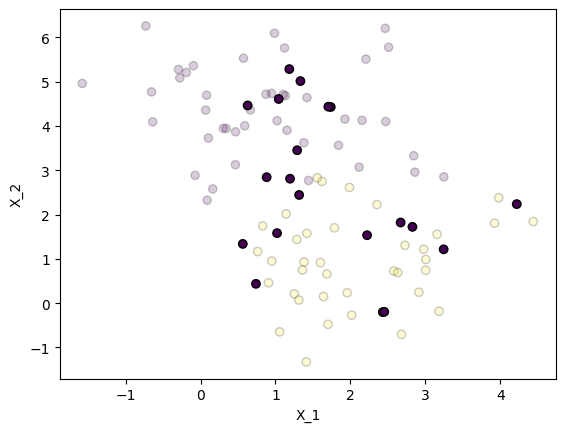

In [9]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=Y, alpha=0.2, edgecolor='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_pred-Y_test, edgecolor='k');
plt.xlabel('X_1')
plt.ylabel('X_2');